In [1]:
import numpy as np
from bitarray.util import int2ba, ba2int

In [2]:
from ga.fabrics import BinaryFabric
from ga.operators import BinaryOperator
from ga.transformers import MultiDimentionTransformer

from ga.evaluators import MinimumEvaluator
from ga.cultivators import TournamentCultivator, SmartWieghtCultivator, EliteCultivator
from ga.algorithms import SimpleGA

from helpers.plotting import plotContour, plotScores

$$
f\left(x_{1}, x_{2}\right)=\sin \left(10 x_{1}\right)+x_{1} \cos \left(2 \pi x_{2}\right)
$$

$$
x_{1} \in[-2,2], x_{2} \in[0,1]
$$

$$f \to min $$

In [3]:
f = lambda x: np.sin(10*x[0]) + x[0]*np.cos(2*np.pi*x[1])

x1_int = [-2, 2]
x2_int = [0.2, 0.8]

x_ints = [x1_int, x2_int]

In [4]:
h_x1 = 1e-7
h_x2 = 1e-5

n_x1 = len(int2ba(int((x1_int[1] - x1_int[0])/h_x1)))
n_x2 = len(int2ba(int((x2_int[1] - x2_int[0])/h_x2)))

n_xs = [n_x1, n_x2]

n = sum(n_xs)

In [5]:
n_xs

[26, 16]

In [6]:
N = 100
max_iterations = 100
max_iterations_without_evolution = 40
p_mutate = 0.6
p_cross = 0.8
p_elite = 0.05
N_t = 5
selection_pressure = 1e-8

In [7]:
fabric = BinaryFabric(n)
operator = BinaryOperator(n)
transformer = MultiDimentionTransformer(n_xs, x_ints)
evaluator = MinimumEvaluator(f, transformer)

tCultivator = TournamentCultivator(N_t, p_mutate, p_cross, operator, evaluator)
sCultivator = SmartWieghtCultivator(N_t, p_mutate, p_cross, operator, evaluator, selection_pressure)

eCultivator = EliteCultivator(sCultivator, p_elite)

ga = SimpleGA(fabric, evaluator, transformer, eCultivator)

In [8]:
ga.solve(N, max_iterations, max_iterations_without_evolution)

0%
10%
20%
30%


([-2.0, 0.2], -1.5309792394775226)

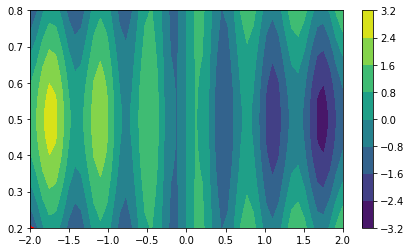

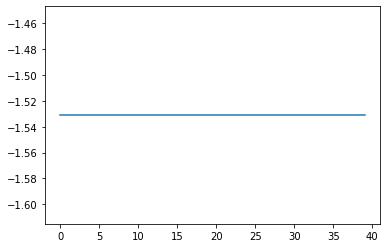

In [9]:
plotContour(lambda x1, x2: f([x1, x2]), x1_int, x2_int, argmin=ga.solution)

plotScores(ga.scores)

In [10]:
ga.best_from_populations

[bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('000000000000000000000000000000000000000000'),
 bitarray('00000000000000000000